In [42]:
# Import the requests library.
import requests
# Import Libraries
import matplotlib.pyplot as plt
import pandas as pd
from citipy import citipy
# Import the random module.
import random
# Import the NumPy module.
import numpy as np
# Import timeit.
import timeit
# Import the datetime module from the datetime library.
from datetime import datetime
# Import the API key.
from config import 	weather_api_key

In [43]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [44]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

47.426971773305524 -130.1828495095474
22.459988414473102 -107.14122679349973
-28.357604219398453 88.33758986207278
-5.720407332715979 177.95145187867513
-4.023431609054626 -151.0937184407417
-2.917085690951936 172.68561730330026
-62.510852614295885 -86.30211952515856
10.039979185418161 104.86008509832271
-32.93841926774837 132.791732397236
48.125431685580594 -133.1872532696467
-24.71776602799389 -167.26636051773062
-45.33527859547748 21.417056463625556
3.5686408203472126 -155.95399941085498
15.508994561222693 7.734405600434798
-87.82737212829113 -70.94954167986518
45.60439952390317 -35.45434692965031
-67.8368829110178 112.37319494964697
78.15259682990109 114.94911453788694
70.12120214589595 67.39971831652207
80.60120182427002 168.532684487751
-73.81069631914406 -100.82741903349948
65.26836746141814 82.77698271263444
-28.205005705107794 -141.1163535112424
5.798850419152913 12.657719402300756
-15.412176323616691 137.07280211093155
-21.180439383025075 -77.5972831007777
85.36754626350574 1

In [45]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [46]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

617

In [47]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [48]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1d141a9c12deef6bbe73f7c0c87f527c


In [49]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [50]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | grand gaube
Processing Record 2 of Set 1 | tacuati
Processing Record 3 of Set 1 | kavaratti
Processing Record 4 of Set 1 | babanusah
City not found. Skipping...
Processing Record 5 of Set 1 | fort nelson
Processing Record 6 of Set 1 | mataura
Processing Record 7 of Set 1 | derzhavinsk
Processing Record 8 of Set 1 | komsomolskiy
Processing Record 9 of Set 1 | tasiilaq
Processing Record 10 of Set 1 | visimo-utkinsk
City not found. Skipping...
Processing Record 11 of Set 1 | mar del plata
Processing Record 12 of Set 1 | salinas
Processing Record 13 of Set 1 | cayenne
Processing Record 14 of Set 1 | hithadhoo
Processing Record 15 of Set 1 | puerto ayora
Processing Record 16 of Set 1 | esperance
Processing Record 17 of Set 1 | butaritari
Processing Record 18 of Set 1 | hobart
Processing Record 19 of Set 1 | richards bay
Processing Record 20 of Set 1 | turayf
Processing Record 21 of Set 1 | lagoa
Proce

Processing Record 38 of Set 4 | sabang
Processing Record 39 of Set 4 | garowe
Processing Record 40 of Set 4 | mys shmidta
City not found. Skipping...
Processing Record 41 of Set 4 | dubti
Processing Record 42 of Set 4 | emba
Processing Record 43 of Set 4 | viedma
Processing Record 44 of Set 4 | howard springs
Processing Record 45 of Set 4 | tilichiki
Processing Record 46 of Set 4 | cukai
Processing Record 47 of Set 4 | aripuana
Processing Record 48 of Set 4 | marzuq
Processing Record 49 of Set 4 | topeka
Processing Record 50 of Set 4 | mityana
Processing Record 1 of Set 5 | naze
Processing Record 2 of Set 5 | waipawa
Processing Record 3 of Set 5 | pospelikha
Processing Record 4 of Set 5 | meulaboh
Processing Record 5 of Set 5 | khasan
Processing Record 6 of Set 5 | paragominas
Processing Record 7 of Set 5 | roma
Processing Record 8 of Set 5 | gamba
Processing Record 9 of Set 5 | surgut
Processing Record 10 of Set 5 | channel-port aux basques
Processing Record 11 of Set 5 | ponta do sol

Processing Record 27 of Set 8 | reefton
City not found. Skipping...
Processing Record 28 of Set 8 | ellensburg
Processing Record 29 of Set 8 | mayo
Processing Record 30 of Set 8 | sentyabrskiy
City not found. Skipping...
Processing Record 31 of Set 8 | shenjiamen
Processing Record 32 of Set 8 | kabinda
Processing Record 33 of Set 8 | niquero
Processing Record 34 of Set 8 | liverpool
Processing Record 35 of Set 8 | heinola
Processing Record 36 of Set 8 | banda aceh
Processing Record 37 of Set 8 | pertuis
Processing Record 38 of Set 8 | isangel
Processing Record 39 of Set 8 | bathsheba
Processing Record 40 of Set 8 | tonj
Processing Record 41 of Set 8 | miri
Processing Record 42 of Set 8 | ko samui
Processing Record 43 of Set 8 | kalabo
Processing Record 44 of Set 8 | halalo
City not found. Skipping...
Processing Record 45 of Set 8 | ahipara
Processing Record 46 of Set 8 | la ronge
Processing Record 47 of Set 8 | severo-kurilsk
Processing Record 48 of Set 8 | sambava
Processing Record 49

Processing Record 17 of Set 12 | droitwich
Processing Record 18 of Set 12 | resistencia
Processing Record 19 of Set 12 | novoagansk
Processing Record 20 of Set 12 | tambongon
Processing Record 21 of Set 12 | sayyan
Processing Record 22 of Set 12 | koroni
Processing Record 23 of Set 12 | angoche
Processing Record 24 of Set 12 | nadym
Processing Record 25 of Set 12 | kamenka
Processing Record 26 of Set 12 | udachnyy
Processing Record 27 of Set 12 | saint-georges
Processing Record 28 of Set 12 | hirara
Processing Record 29 of Set 12 | laguna
Processing Record 30 of Set 12 | san francisco
Processing Record 31 of Set 12 | khonuu
City not found. Skipping...
Processing Record 32 of Set 12 | karratha
Processing Record 33 of Set 12 | sananduva
Processing Record 34 of Set 12 | sakaraha
Processing Record 35 of Set 12 | mendahara
City not found. Skipping...
Processing Record 36 of Set 12 | diamantino
Processing Record 37 of Set 12 | pokhara
Processing Record 38 of Set 12 | ocara
Processing Record 

In [51]:
# Print the city count to confirm sufficient count.
len(city_data)

567

In [52]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Grand Gaube,-20.0064,57.6608,80.01,77,13,3.00,MU,2021-04-03 02:49:22
1,Tacuati,-23.4500,-56.5833,69.04,55,27,2.66,PY,2021-04-03 02:49:22
2,Kavaratti,10.5669,72.6420,82.99,58,100,10.89,IN,2021-04-03 02:42:23
3,Fort Nelson,58.8053,-122.7002,32.00,37,75,8.05,CA,2021-04-03 02:43:24
4,Mataura,-46.1927,168.8643,60.01,58,98,8.01,NZ,2021-04-03 02:42:27
5,Derzhavinsk,51.1000,66.3167,24.10,80,66,8.68,KZ,2021-04-03 02:49:23
6,Komsomolskiy,40.4272,71.7189,39.20,60,0,4.61,UZ,2021-04-03 02:42:25
7,Tasiilaq,65.6145,-37.6368,30.20,80,75,8.05,GL,2021-04-03 02:43:10
8,Mar Del Plata,-38.0023,-57.5575,66.99,88,20,5.75,AR,2021-04-03 02:38:07
9,Salinas,36.6777,-121.6555,53.60,71,90,12.66,US,2021-04-03 02:49:23


In [53]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Grand Gaube,MU,2021-04-03 02:49:22,-20.0064,57.6608,80.01,77,13,3.00
1,Tacuati,PY,2021-04-03 02:49:22,-23.4500,-56.5833,69.04,55,27,2.66
2,Kavaratti,IN,2021-04-03 02:42:23,10.5669,72.6420,82.99,58,100,10.89
3,Fort Nelson,CA,2021-04-03 02:43:24,58.8053,-122.7002,32.00,37,75,8.05
4,Mataura,NZ,2021-04-03 02:42:27,-46.1927,168.8643,60.01,58,98,8.01
5,Derzhavinsk,KZ,2021-04-03 02:49:23,51.1000,66.3167,24.10,80,66,8.68
6,Komsomolskiy,UZ,2021-04-03 02:42:25,40.4272,71.7189,39.20,60,0,4.61
7,Tasiilaq,GL,2021-04-03 02:43:10,65.6145,-37.6368,30.20,80,75,8.05
8,Mar Del Plata,AR,2021-04-03 02:38:07,-38.0023,-57.5575,66.99,88,20,5.75
9,Salinas,US,2021-04-03 02:49:23,36.6777,-121.6555,53.60,71,90,12.66


In [56]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [57]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [58]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1617419197.145349

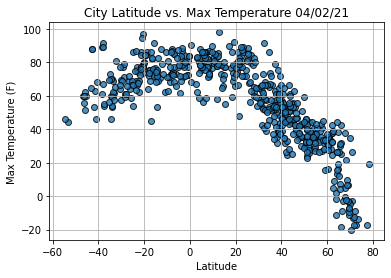

In [59]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

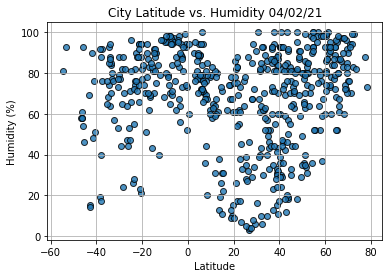

In [60]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

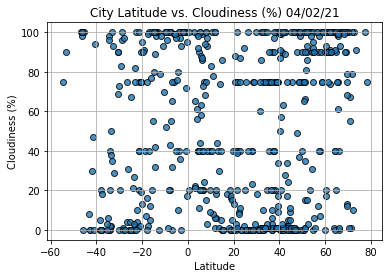

In [61]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

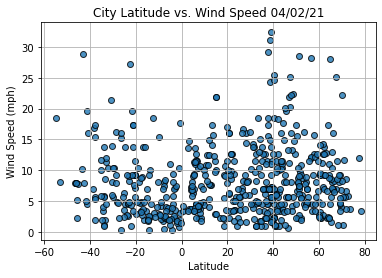

In [62]:
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1,marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig4.png")

# Show plot
plt.show()

In [67]:
# x value = independent variable
# y value = dependent variable

In [72]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perfrom linear regression on the weather data
# and plot a regressio line and the equation with the data
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    # Perform linear regression.
    # Run regression on hemisphere weather data
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y_values" from the slope and intercept
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line
    line_eq = "y = "+ str(round(slope,2))+"x + "+str(round(intercept,2))
    # Create a scatter plot and plot the regression line
    plt.scatter(x_values, y_values)
    # Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
    plt.plot(x_values, regress_values,"r")
    # Annotate the text for the line equation
    plt.annotate(line_eq, text_coordinates, fontsize=15,color="red")
    plt.xlabel("Latitude")
    plt.ylabel(y_label)
    plt.show()

In [75]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

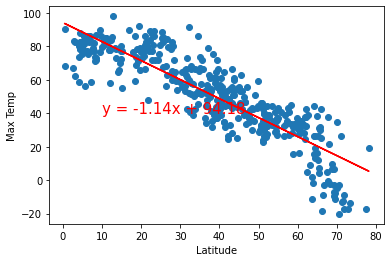

In [76]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

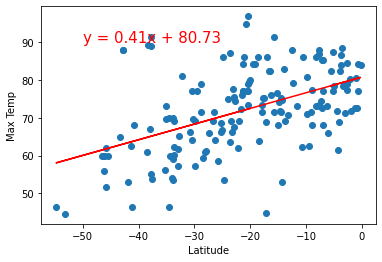

In [77]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

#### **Finding**

The correlation between the latitude and the maximum temperature is strong to very strong because the r-value is less than –0.7 for the Northern Hemisphere and greater than 0.7 for the Southern Hemisphere, as shown by the plots here. This means that as we approach the equator, 0° latitude, the temperatures become warmer. And when we are further from the equator the temperatures become cooler. Check the r-values for your plots. 

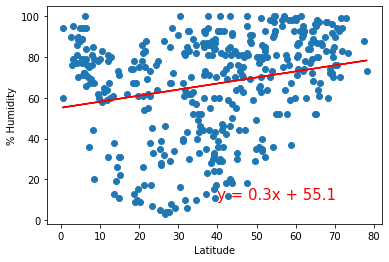

In [78]:
# Linear regression on the Northern Hemisphere for %Humidity
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

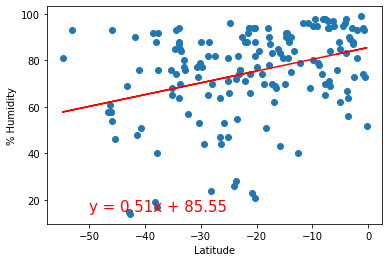

In [80]:
# Linear regression on the Southern Hemisphere for %Humidity
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

#### **Finding**

The correlation between the latitude and percent humidity is very low because the r-value is less than 0.04 for the Northern and Southern Hemispheres for the plots shown here. This means that percent humidity is unpredictable due to changing weather patterns that can increase or decrease percent humidity. Check the r-values for your plots. 

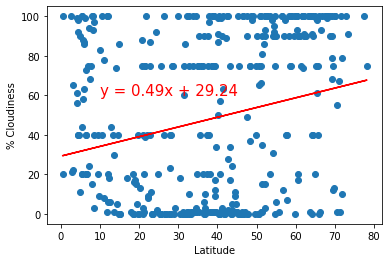

In [81]:
# Linear regression on the Northern Hemisphere for % cloudiness
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Call the function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness','% Cloudiness',(10,60))

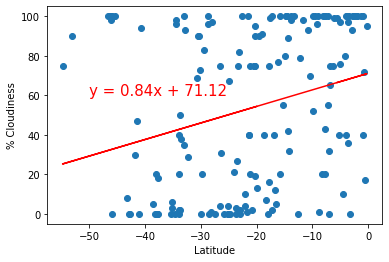

In [83]:
# Linear regression on the Southern Hemisphere for % cloudiness
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

#### **Finding**

The correlation between the latitude and percent cloudiness is very low because the r-value is less than –0.09 for the Northern Hemisphere and less than –0.02 for the Southern Hemisphere for the plots shown here. This means that cloudiness is unpredictable due to changing weather patterns that can increase or decrease percent cloudiness. Check the r-values for your plots

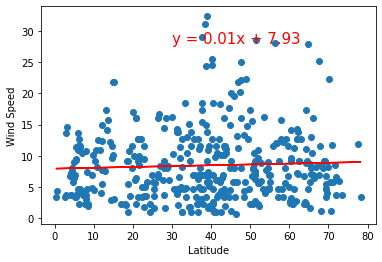

In [89]:
# Linear regression on the Northern Hemisphere for wind speed
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(30,28))

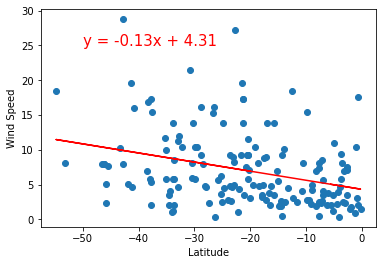

In [93]:
# Linear regression on the Southern Hemisphere for wind speed
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,25))

#### **Finding**

The correlation between the latitude and wind speed is very low because the r-value is less  than –0.07 for the Northern Hemisphere and less than –0.3 for the Southern Hemisphere for the plots shown here. This means that wind speed is unpredictable due to changing weather patterns that can increase or decrease wind speed. Check the r-values for your plots. 